# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [3]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [4]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Preprocessing of 'Teacher_prefix'

In [5]:
teacher_pre = []
for prefix in project_data['teacher_prefix'].values:
    if prefix==prefix:
        prefix = re.sub('[^A-Za-z0-9]','',prefix).lower()
        teacher_pre.append(prefix)
    else:
        teacher_pre.append(prefix)
    
project_data['teacher_prefix'] = teacher_pre

## Preprocessing of project_grade_category

In [6]:
project_grade_cat = []
for grade in project_data['project_grade_category'].values:
    grade = grade.replace('-','_').lower()
    grade = grade.replace(' ','_').lower()
    project_grade_cat.append(grade)
project_data['project_grade_category'] = project_grade_cat

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data['essay'] = list(project_data["essay"].apply(lambda x: x.lower()))

In [0]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [9]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [10]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

# Stratified Distribution between Train-Test-Cv(64-20-16)

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(project_data,project_data['project_is_approved'],test_size = 0.2, stratify = project_data['project_is_approved'])
X_train.drop(['project_is_approved'],axis=1,inplace=True)
X_test.drop(['project_is_approved'],axis=1,inplace=True)
#X_cv.drop(['project_is_approved'],axis=1,inplace=True)
print(X_train.shape)
print(X_test.shape)

In [11]:
X_train = pd.read_csv('X_train')
X_test = pd.read_csv('X_test')
y_train = pd.read_csv('Y_train',names = ['Unnamed:0','project_is_approved'])
y_test = pd.read_csv('Y_test',names = ['Unnamed:0','project_is_approved'])

In [12]:
project_grade_cat_train = []
for grade in X_train['project_grade_category'].values:
    grade = grade.replace('-','_').lower()
    grade = grade.replace(' ','_').lower()
    project_grade_cat_train.append(grade)
X_train['project_grade_category'] = project_grade_cat_train

In [13]:
project_grade_cat_test = []
for grade in X_test['project_grade_category'].values:
    grade = grade.replace('-','_').lower()
    grade = grade.replace(' ','_').lower()
    project_grade_cat_test.append(grade)
X_test['project_grade_category'] = project_grade_cat_test

# <h2><font color='red'> 1.4 Preprocessing of Essay on Trainig data</font></h2>

In [14]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 87398/87398 [00:48<00:00, 1798.77it/s]


# <h2><font color='red'> 1.4 Preprocessing of Essay on Test data</font></h2>

In [15]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 21850/21850 [00:12<00:00, 1731.19it/s]


In [0]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

# <h2><font color='black'> 1.4 Preprocessing of `project_title`</font></h2>

# <h2><font color='red'> 1.4 Preprocessing of Title on Training data</font></h2>

In [16]:
# similarly you can preprocess the titles also
preprocessed_titles_train =[]
for title in tqdm(X_train['project_title'].values):
        des = decontracted(title)
        des = des.replace("\\r",' ')
        des = des.replace('\\"',' ')
        des = des.replace('\\n',' ')
        des = re.sub('[^A-Za-z0-9]+',' ',des)
        des = ' '.join(e for e in des.split() if e.lower() not in stopwords)
        preprocessed_titles_train.append(des.lower().strip())        

100%|█████████████████████████████████████████████████████████████████████████| 87398/87398 [00:02<00:00, 37267.12it/s]


# <h2><font color='red'> 1.4 Preprocessing of Title on Test data</font></h2>

In [17]:
preprocessed_titles_test =[]
for title in tqdm(X_test['project_title'].values):
        des = decontracted(title)
        des = des.replace("\\r",' ')
        des = des.replace('\\"',' ')
        des = des.replace('\\n',' ')
        des = re.sub('[^A-Za-z0-9]+',' ',des)
        des = ' '.join(e for e in des.split() if e.lower() not in stopwords)
        preprocessed_titles_test.append(des.lower().strip()) 

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 36868.93it/s]


# Sentimental Analysis of Essay

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()
positive_tr,positive_ts,positive_cv=[],[],[]
negative_tr ,negative_ts,negative_cv= [],[],[]
neutral_tr,neutral_ts,neutral_cv = [],[],[]
comp_tr ,comp_ts,comp_cv= [],[],[]

    

# Training Data Sentiment

In [ ]:
for i in tqdm(X_train['essay']):
    positive_tr.append(senti.polarity_scores(i)['pos'])
    negative_tr.append(senti.polarity_scores(i)['neg'])
    neutral_tr.append(senti.polarity_scores(i)['neu'])
    comp_tr.append(senti.polarity_scores(i)['compound'])
X_train['pos'] = positive_tr
X_train['neg'] = negative_tr
X_train['neu'] = neutral_tr
X_train['comp'] = comp_tr

# Test Data Sentiment

In [ ]:
for i in tqdm(X_test['essay']):
    positive_ts.append(senti.polarity_scores(i)['pos'])
    negative_ts.append(senti.polarity_scores(i)['neg'])
    neutral_ts.append(senti.polarity_scores(i)['neu'])
    comp_ts.append(senti.polarity_scores(i)['compound'])
X_test['pos'] = positive_ts
X_test['neg'] = negative_ts
X_test['neu'] = neutral_ts
X_test['comp'] = comp_ts

## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### <h2><font color = 'red'> One hot encoding of categories column in train,test,and cv data<font/><h2/>

In [18]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
categories_one_hot_train = vectorizer.transform(preprocessed_essays_train)
categories_one_hot_test = vectorizer.transform(preprocessed_essays_test)
#categories_one_hot_cv = vectorizer.transform(preprocessed_essays_cv)
print(vectorizer.get_feature_names())
print("Shape of Train matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of Test matrix after one hot encodig ",categories_one_hot_test.shape)
#print("Shape of CV matrix after one hot encodig ",categories_one_hot_cv.shape)


['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']
Shape of Train matrix after one hot encodig  (87398, 9)
Shape of Test matrix after one hot encodig  (21850, 9)


# <h2><font color = 'red'> One hot encoding of sub categories column in train,test,and cv data<font/><h2/>

In [19]:
# we use count vectorizer_sub to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_sub = CountVectorizer( lowercase=False, binary=True)
vectorizer_sub.fit(X_train['clean_subcategories'].values)
sub_categories_one_hot_train = vectorizer_sub.transform(preprocessed_titles_train)
sub_categories_one_hot_test = vectorizer_sub.transform(preprocessed_titles_test)
#sub_categories_one_hot_cv = vectorizer_sub.transform(preprocessed_titles_cv)
print(vectorizer_sub.get_feature_names())
print("Shape of Train matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of Test matrix after one hot encodig ",sub_categories_one_hot_test.shape)
#print("Shape of CV matrix after one hot encodig ",sub_categories_one_hot_cv.shape)

['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']
Shape of Train matrix after one hot encodig  (87398, 30)
Shape of Test matrix after one hot encodig  (21850, 30)


# <h2><font color = 'red'> One hot encoding of teacher prefix column in train,test,and cv data<font/><h2/>

In [20]:
#https://stackoverflow.com/questions/11620914/removing-nan-values-from-an-array
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer_prefix = CountVectorizer(lowercase = False,binary = True)
vectorizer_prefix = vectorizer_prefix.fit(X_train['teacher_prefix'].values.astype('U'))
prefix_one_hot_train = vectorizer_prefix.transform(X_train['teacher_prefix'].values.astype('U'))
#prefix_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
prefix_one_hot_test = vectorizer_prefix.transform(X_test['teacher_prefix'].values.astype('U'))
print(vectorizer_prefix.get_feature_names())
print("Shape of matrix after one hot encoding ", prefix_one_hot_train.shape)
#print("Shape of matrix after one hot encoding ", prefix_one_hot_cv.shape)
print("Shape of matrix after one hot encoding ", prefix_one_hot_test.shape)

['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']
Shape of matrix after one hot encoding  (87398, 6)
Shape of matrix after one hot encoding  (21850, 6)


# <h2><font color = 'red'> One hot encoding of project grade column in train,test,and cv data<font/><h2/>

In [21]:
vectorizer_grade = CountVectorizer(lowercase = False,binary = True)
vectorizer_grade = vectorizer_grade.fit(X_train['project_grade_category'].values.astype('U'))
project_grade_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values.astype('U'))
#project_grade_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values.astype('U'))
project_grade_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values.astype('U'))
print(vectorizer_grade.get_feature_names())
print("Shape of matrix after one hot encoding ", project_grade_one_hot_train.shape)
#print("Shape of matrix after one hot encoding ", project_grade_one_hot_cv.shape)
print("Shape of matrix after one hot encoding ", project_grade_one_hot_test.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
Shape of matrix after one hot encoding  (87398, 4)
Shape of matrix after one hot encoding  (21850, 4)


# <h2><font color = 'red'> One hot encoding of State column in train,test,and cv data<font/><h2/>

In [22]:
vectorizer_state = CountVectorizer(lowercase = False,binary = True)
vectorizer_state.fit(X_train['school_state'].values)
state_one_hot_train = vectorizer_state.transform(X_train['school_state'].values)
state_one_hot_test =  vectorizer_state.transform(X_test['school_state'].values)
#state_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)
print(vectorizer_state.get_feature_names())
print("Shape of Train matrix after one hot encoding ", state_one_hot_train.shape)
print("Shape of Test matrix after one hot encoding ", state_one_hot_test.shape)
#print("Shape of cv matrix after one hot encoding ", state_one_hot_cv.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of Train matrix after one hot encoding  (87398, 51)
Shape of Test matrix after one hot encoding  (21850, 51)


# Essay and Title Words Count 

# Train Data

In [23]:
essay_word_counter_train = []
title_word_counter_train = []
for sent in preprocessed_essays_train:
    count = len(set(sent.split()))
    essay_word_counter_train.append(count)
for title in preprocessed_titles_train:
    count = len(set(title.split()))
    title_word_counter_train.append(count)
X_train['Essay_word_count'] = essay_word_counter_train
X_train['Title_word_count'] = title_word_counter_train

# Test Data

In [24]:
essay_word_counter_test = []
title_word_counter_test = []
for sent in preprocessed_essays_test:
    count = len(set(sent.split()))
    essay_word_counter_test.append(count)
for title in preprocessed_titles_test:
    count = len(set(title.split()))
    title_word_counter_test.append(count)
X_test['Essay_word_count'] = essay_word_counter_test
X_test['Title_word_count'] = title_word_counter_test

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

# TFIDF - Essays and Titles

# <h2><font color = 'red'>Essay on Train-Test dataset<font/><h2/>

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
essay_tfidf_train = vectorizer_essay_tfidf.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",essay_tfidf_train.shape)

Shape of matrix after one hot encodig  (87398, 15130)


In [26]:
essay_tfidf_test = vectorizer_essay_tfidf.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",essay_tfidf_test.shape)

Shape of matrix after one hot encoding  (21850, 15130)


# <h2><font color = 'red'>Title on Train-Test dataset<font/><h2/>

In [27]:
vectorizer_title_tfidf = TfidfVectorizer(min_df = 10)
title_tfidf_train = vectorizer_title_tfidf.fit_transform(preprocessed_titles_train)
print("Shape of matrix after one hot encding ",title_tfidf_train.shape)

Shape of matrix after one hot encding  (87398, 2819)


In [28]:
title_tfidf_test = vectorizer_title_tfidf.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encding ",title_tfidf_test.shape)

Shape of matrix after one hot encding  (21850, 2819)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [42]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# avg w2v vectors on Preprocessed Essays - Training data

In [43]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_train.append(vector)

print(len(avg_w2v_vectors_essays_train))
print(len(avg_w2v_vectors_essays_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 87398/87398 [00:29<00:00, 2997.41it/s]


87398
300


# avg w2v vectors on Preprocessed Essays - Test data

In [44]:
avg_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_test.append(vector)

print(len(avg_w2v_vectors_essays_test))
print(len(avg_w2v_vectors_essays_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 21850/21850 [00:07<00:00, 2895.02it/s]


21850
300


# avg w2v vectors on Preprocessed Titles - Training data

In [45]:
#compute avg w2v for each title
avg_w2V_vectors_title_train =[]
for title in tqdm(preprocessed_titles_train):
    vector_title = np.zeros(300)
    cnt_words = 0
    for word in title.split():
        if word in glove_words:
            vector_title+=model[word]
            cnt_words+=1
    if cnt_words!=0:
        vector_title/=cnt_words
    avg_w2V_vectors_title_train.append(vector_title)
print(len(avg_w2V_vectors_title_train))
print(len(avg_w2V_vectors_title_train[0]))
        

100%|█████████████████████████████████████████████████████████████████████████| 87398/87398 [00:01<00:00, 59586.43it/s]


87398
300


# avg w2v vectors on Preprocessed Titles - Test data

In [46]:
#compute avg w2v for each title
avg_w2V_vectors_title_test =[]
for title in tqdm(preprocessed_titles_test):
    vector_title = np.zeros(300)
    cnt_words = 0
    for word in title.split():
        if word in glove_words:
            vector_title+=model[word]
            cnt_words+=1
    if cnt_words!=0:
        vector_title/=cnt_words
    avg_w2V_vectors_title_test.append(vector_title)
print(len(avg_w2V_vectors_title_test))
print(len(avg_w2V_vectors_title_test[0]))
        

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 55110.88it/s]


21850
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [07:32<00:00, 241.33it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [29]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
#X_cv = pd.merge(X_cv,price_data, on ='id',how = 'left')
X_test = pd.merge(X_test,price_data, on ='id',how = 'left')

# PRICE

In [30]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()
price_scalar.fit(X_train['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(1, -1)).reshape(-1,1)
#price_standardized_cv = price_scalar.transform(X_cv['price'][0:12000].values.reshape(-1,1))
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)


# Quantity

In [31]:
# standardized quantity columns 
quantity_scaler = Normalizer()
quantity_scaler.fit(X_train['quantity'].values.reshape(1,-1))
#print(f"Mean :{quantity_scaler.mean_[0]},Standard Deviation :{np.sqrt(quantity_scaler.var_[0])}")
quantity_standardized_train = quantity_scaler.transform(X_train['quantity'].values.reshape(1,-1)).reshape(-1,1)
#quantity_standardized_cv = quantity_scaler.transform(X_cv['quantity'][0:12000].values.reshape(-1,1))
quantity_standardized_test = quantity_scaler.transform(X_test['quantity'].values.reshape(1,-1)).reshape(-1,1)

# No.of previously done Project

In [32]:
#standardized projects proposed by teachers
project_scaler = Normalizer()
project_scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#print(f"Mean :{project_scaler.mean_[0]},Standard Deviation :{np.sqrt(project_scaler.var_[0])}")
project_standardized_train = project_scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
#project_standardized_cv = project_scaler.transform(X_cv['teacher_number_of_previously_posted_projects'][0:12000].values.reshape(-1,1))
project_standardized_test = project_scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)

# Essay Count

In [33]:
#standardized Essay Count
Essay_count_scaler = Normalizer()
Essay_count_scaler.fit(X_train['Essay_word_count'].values.reshape(1,-1))
#print(f"Mean :{Essay_count_scaler.mean_[0]},Standard Deviation :{np.sqrt(Essay_count_scaler.var_[0])}")
Essay_count_standardized_train = Essay_count_scaler.transform(X_train['Essay_word_count'].values.reshape(1,-1)).reshape(-1,1)
Essay_count_standardized_test = Essay_count_scaler.transform(X_test['Essay_word_count'].values.reshape(1,-1)).reshape(-1,1)
#Essay_count_standardized_cv = Essay_count_scaler.transform(X_cv['Essay_word_count'][:45000].values.reshape(-1,1))

# Title Count

In [34]:
#standardized Title Count
title_count_scaler = Normalizer()
title_count_scaler.fit(X_train['Title_word_count'].values.reshape(1,-1))
#print(f"Mean :{title_count_scaler.mean_[0]},Standard Deviation :{np.sqrt(title_count_scaler.var_[0])}")
title_count_standardized_train = title_count_scaler.transform(X_train['Title_word_count'].values.reshape(1,-1)).reshape(-1,1)
title_count_standardized_test = title_count_scaler.transform(X_test['Title_word_count'].values.reshape(1,-1)).reshape(-1,1)
#title_count_standardized_cv = title_count_scaler.transform(X_cv['Title_word_count'][:45000].values.reshape(-1,1))

# Essay positive Sentiment

In [35]:
# normalize positive sentiment of essay 
pos_senti_scaler = Normalizer()
pos_senti_scaler.fit(X_train['pos'].values.reshape(1,-1))
essay_pos_train = pos_senti_scaler.transform(X_train['pos'].values.reshape(1,-1)).reshape(-1,1)
essay_pos_test = pos_senti_scaler.transform(X_test['pos'].values.reshape(1,-1)).reshape(-1,1)

# Essay Negative Sentiment

In [36]:
neg_senti_scaler = Normalizer()
neg_senti_scaler.fit(X_train['neg'].values.reshape(1,-1))
essay_neg_train = neg_senti_scaler.transform(X_train['neg'].values.reshape(1,-1)).reshape(-1,1)
essay_neg_test = neg_senti_scaler.transform(X_test['neg'].values.reshape(1,-1)).reshape(-1,1)

# Essay Neutral Sentiment

In [37]:
neu_senti_scaler = Normalizer()
neu_senti_scaler.fit(X_train['neu'].values.reshape(1,-1))
essay_neu_train = neu_senti_scaler.transform(X_train['neu'].values.reshape(1,-1)).reshape(-1,1)
essay_neu_test = neu_senti_scaler.transform(X_test['neu'].values.reshape(1,-1)).reshape(-1,1)

# Essay Compound Sentiment

In [38]:
comp_senti_scaler = Normalizer()
comp_senti_scaler.fit(X_train['comp'].values.reshape(1,-1))
essay_comp_train = comp_senti_scaler.transform(X_train['comp'].values.reshape(1,-1)).reshape(-1,1)
essay_comp_test = comp_senti_scaler.transform(X_test['comp'].values.reshape(1,-1)).reshape(-1,1)

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

# categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)

In [164]:
# Please write all the code with proper documentation
#from xgboost import XGBClassifier
#import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train[:45000],sub_categories_one_hot_train[:45000],prefix_one_hot_train[:45000],
project_grade_one_hot_train[:45000],state_one_hot_train[:45000],sparse.csr_matrix(price_standardized_train[:45000]),
        sparse.csr_matrix(quantity_standardized_train[:45000]),sparse.csr_matrix(project_standardized_train[:45000]),
               sparse.csr_matrix(Essay_count_standardized_train[:45000]),sparse.csr_matrix(title_count_standardized_train[:45000])
               ,sparse.csr_matrix(essay_pos_train[:45000]),sparse.csr_matrix(essay_neg_train[:45000]),sparse.csr_matrix(essay_neu_train[:45000]),
               sparse.csr_matrix(essay_comp_train[:45000]),essay_tfidf_train[:45000],title_tfidf_train[:45000])).tocsr()


X_ts =  hstack((categories_one_hot_test[:15000],sub_categories_one_hot_test[:15000],prefix_one_hot_test[:15000],
project_grade_one_hot_test[:15000],state_one_hot_test[:15000],sparse.csr_matrix(price_standardized_test[:15000]),
        sparse.csr_matrix(quantity_standardized_test[:15000]),sparse.csr_matrix(project_standardized_test[:15000]),
        sparse.csr_matrix(Essay_count_standardized_test[:15000]),sparse.csr_matrix(title_count_standardized_test[:15000])
                 ,sparse.csr_matrix(essay_pos_test[:15000]),sparse.csr_matrix(essay_neg_test[:15000]),sparse.csr_matrix(essay_neu_test[:15000]),
               sparse.csr_matrix(essay_comp_test[:15000]),essay_tfidf_test[:15000],title_tfidf_test[:15000])).tocsr()

In [40]:
tfidf_features_names = []
for i in vectorizer.get_feature_names():
    tfidf_features_names.append(i)
for i in vectorizer_sub.get_feature_names():
    tfidf_features_names.append(i)
for i in vectorizer_prefix.get_feature_names():
    tfidf_features_names.append(i)
for i in vectorizer_grade.get_feature_names():
    tfidf_features_names.append(i)
for i in vectorizer_state.get_feature_names():
    tfidf_features_names.append(i)

In [41]:
tfidf_features_names.append("Price")
tfidf_features_names.append("Quantity")
tfidf_features_names.append("Previously done projects")
tfidf_features_names.append("Essay Counts")
tfidf_features_names.append("Title Counts")
tfidf_features_names.append("Essay Pos Senti")
tfidf_features_names.append("Essay Neg Senti")
tfidf_features_names.append("Essay Neu Senti")
tfidf_features_names.append("Essay Comp Ssenti")

In [43]:
for i in vectorizer_essay_tfidf.get_feature_names():
    tfidf_features_names.append(i)
for i in vectorizer_title_tfidf.get_feature_names():
    tfidf_features_names.append(i)

In [165]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
X_new = SelectKBest(f_classif,k=5000).fit_transform(X_tr,y_train[:45000]["project_is_approved"])

In [46]:
X_new.shape

(45000, 5000)

<h2>2.5 Apply Kmeans</h2>

In [41]:
from sklearn.cluster import KMeans,AgglomerativeClustering,MiniBatchKMeans,DBSCAN

In [49]:
model_k_means = KMeans(n_clusters=2,init='k-means++',n_init=5,precompute_distances=True,max_iter=100)
model_k_means.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=5, n_jobs=None, precompute_distances=True,
       random_state=None, tol=0.0001, verbose=0)

In [166]:
k_means = [1,2,3,4,5,6,7,8,9,10]
euclidean_dist = []
n_iter_run = []
cluster_label = []
for k in tqdm(k_means):
    model = KMeans(n_clusters=k,init='k-means++',n_init=10,precompute_distances=True,max_iter=200,n_jobs=-1)
    model.fit(X_new)
    euclidean_dist.append(model.inertia_)
    n_iter_run.append(model.n_iter_)
    cluster_label.append(model.labels_)
    

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [23:51<00:00, 191.30s/it]


# K vs inertia_ 

In [190]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = k_means,y = euclidean_dist,mode ='lines+markers+text',name = "Elbow Knee Curve",showlegend = True ))
fig.add_trace(go.Scatter(x = [2],y = [82002],mode = 'lines+markers',name = 'Elbow Point'))
fig.update_layout(title = 'K vs Euclidean Distance',
                  shapes=[
                # Line Vertical
            go.layout.Shape(
            type="line",
            x0=0,
            y0=82002,
            x1=2,
            y1=82002,
            line=dict(
                color="red",
                width=1
            ))],
                  xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'K Hyperparameter for Clustering')),
                 yaxis = go.layout.YAxis(title = go.layout.yaxis.Title(text = "Euclidean Distance From centroid")))
fig.show()

### As we can see from above plot that with increase in cluster the Euclidean distance from the centroid decreases .

### We can see our elbow point at k=2 which is true as our class label is also 2.

# Silhouette Score Variation For Each Cluster

In [187]:
from sklearn.metrics import silhouette_score
score = []
for j in tqdm(cluster_label[1:]):
    score.append(silhouette_score(X_new,j))

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [27:53<00:00, 182.98s/it]


In [188]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = k_means,y = score,mode ='lines+markers+text',name = "Score",showlegend = True ))
fig.update_layout(title = 'K vs Silhouette Score',
                  xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'K Hyperparameter for Clustering')),
                 yaxis = go.layout.YAxis(title = go.layout.yaxis.Title(text = "Silhouette Score")))
fig.show()

### Silhouette Score is ploted against k - hyperparameter and as we can see score for 2 is largest of all and that's what silhouette score explain :

### As the value of score reaches toward 1 then cluster is well defined with no-overlapping.

### As score is more closer to "zero" we can say cluster is overlapped i.e not well seperated .

### If Score is in negative and reaching towards -1 we can say datapoints has wrongly clustered.

### From above plot we can say that clustered hasn't been seperated but overlapped.

# Essay representation Of each Cluster through WordCloud

In [191]:
model = KMeans(n_clusters=2,init='k-means++',n_init=10,precompute_distances=True,max_iter=300,n_jobs=-1)
model.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances=True,
       random_state=None, tol=0.0001, verbose=0)

In [192]:
X_new_0 = X_train.loc[list(np.where(model.labels_==0)[0])]
X_new_1 = X_train.loc[list(np.where(model.labels_==1)[0])]

In [48]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def WordCloud_visual(df,stopwords):
    Essay = list(df['essay'].values)
    tot_text = " "
    for text in Essay:
        tot_text = tot_text + text
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tot_text) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

   # Cluster 1 WordCloud

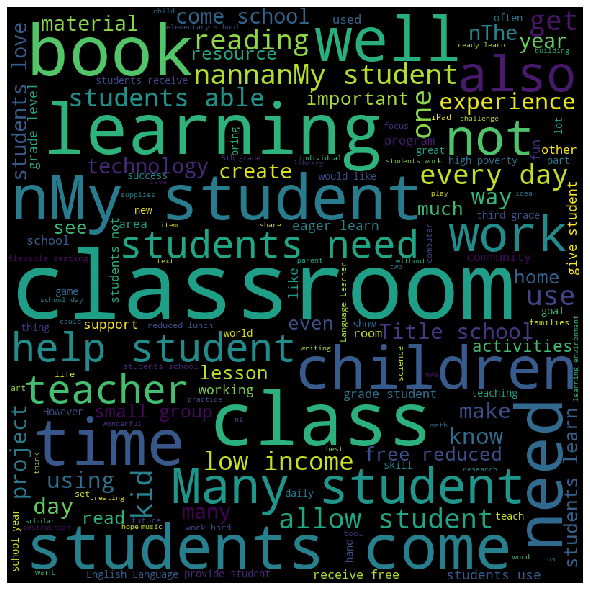

In [51]:
WordCloud_visual(X_new_0,stopwords)

In [234]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_0['teacher_prefix'].value_counts().index ),
                        y =list(X_new_0['teacher_prefix'].value_counts()))])
fig.show()

In [241]:
X_new_0.groupby('teacher_prefix').agg({'Essay_word_count':{'mean_essay_count':'sum'},'price':{'mean_price':'sum'}
                                       })

Essay_word_count       price
               mean_essay_count  mean_price
teacher_prefix                             
dr                          655     1062.11
mr                       461484  1645640.86
ms                      1670239  4827162.77
teacher                   99635   304451.91

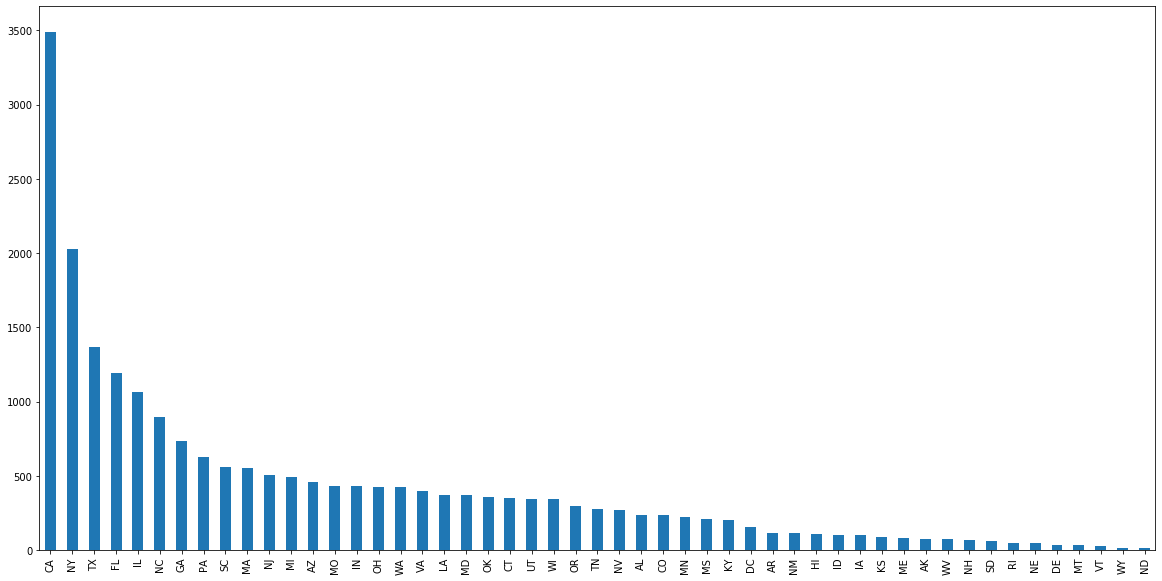

In [243]:
plt.figure(figsize = (20,10))
X_new_0['school_state'].value_counts().plot(kind='bar')

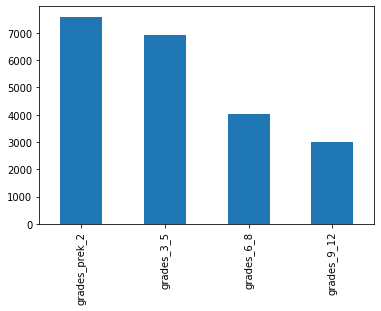

In [247]:
X_new_0['project_grade_category'].value_counts().plot(kind = 'bar')

   # Cluster 2 WordCloud

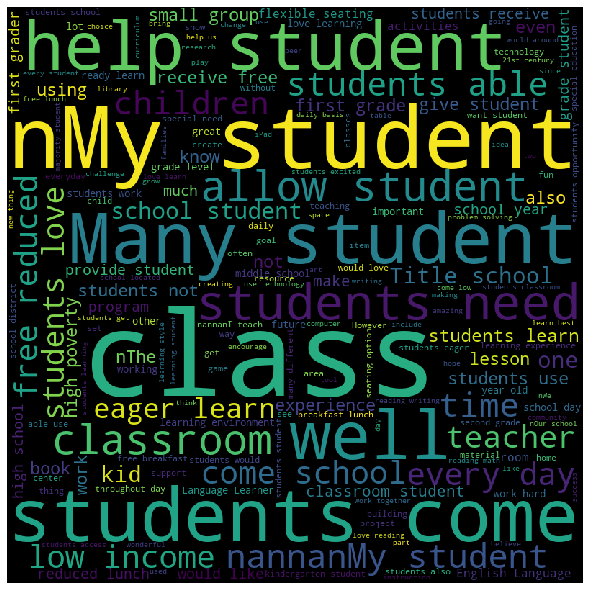

In [52]:
WordCloud_visual(X_new_1,stopwords)

In [238]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_1['teacher_prefix'].value_counts().index ),
                        y =list(X_new_1['teacher_prefix'].value_counts()))])
fig.show()

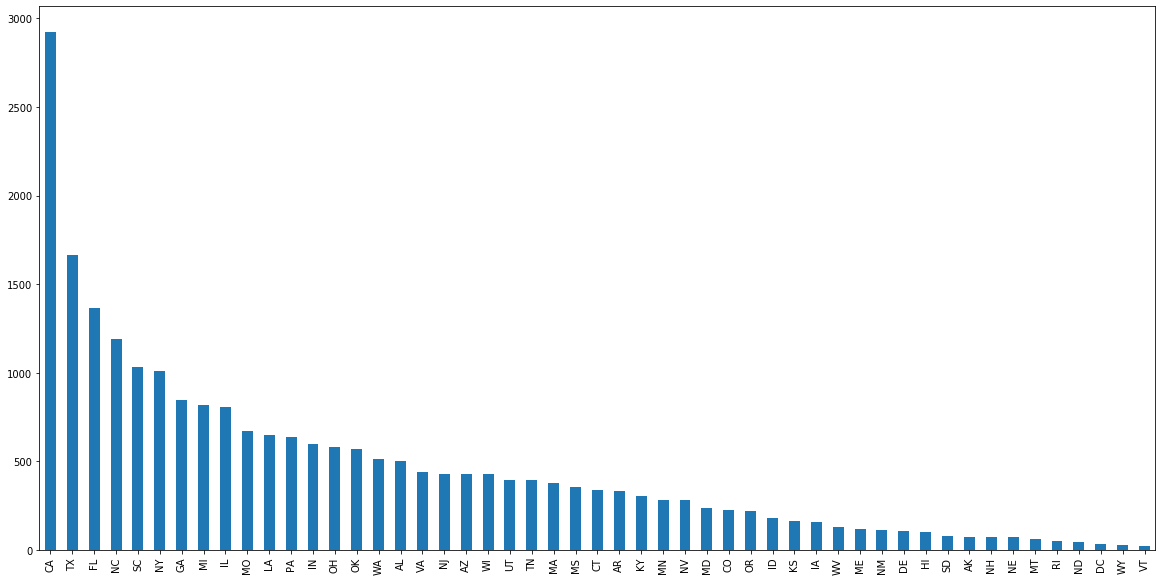

In [244]:
plt.figure(figsize = (20,10))
X_new_1['school_state'].value_counts().plot(kind='bar')

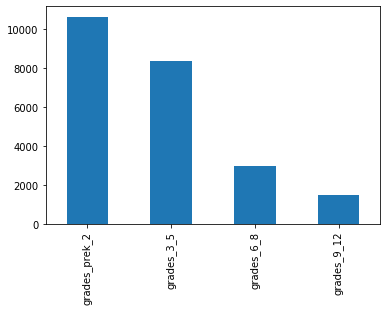

In [249]:
X_new_1['project_grade_category'].value_counts().plot(kind = 'bar')

# Summary Looking Above two Cluster

### The main point that we analyze looking EDA of above two clusters that cluster 2 has teacher prefix of only 1 category i.e 'mrs' and cluster 1 has teacher prefix of all other category except  'mrs ', so we can say cluster 2 is the whose teacher_prefix is 'mrs' and cluster 1 which don't have teacher prefix of  'mrs'.

### The grade category and state column of  each cluster is equally distributed

###  In cluster 1 essay column has 'classroom','learning','well','book' etc as frequently occured word and in cluster 2 essay column has 'My student', 'many student','student come','class' etc as frequently occured word.

# Agglormerative Clustering with k = 2

In [42]:
X_new_agglo = X_new[:10000]
X_new_agglo = X_new_agglo.toarray()

In [48]:
model_agglo = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
model_agglo.fit(X_new_agglo)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [49]:
X_new_agglo_0 = X_train[:10000].loc[list(np.where(model_agglo.labels_==0)[0])]
X_new_agglo_1 = X_train[:10000].loc[list(np.where(model_agglo.labels_==1)[0])]

In [52]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def WordCloud_visual(df,stopwords):
    Essay = list(df['essay'].values)
    tot_text = " "
    for text in Essay:
        tot_text = tot_text + text
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tot_text) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

# WordCloud Representation of Essay 

## Cluster 1

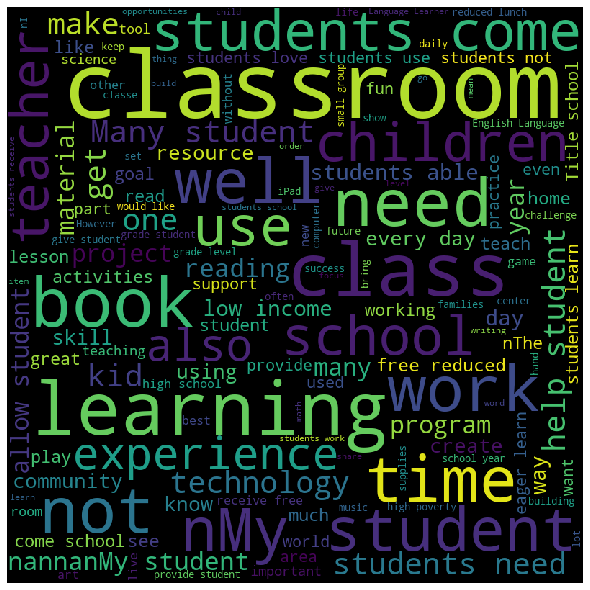

In [53]:
WordCloud_visual(X_new_agglo_0,stopwords)

## Cluster 2

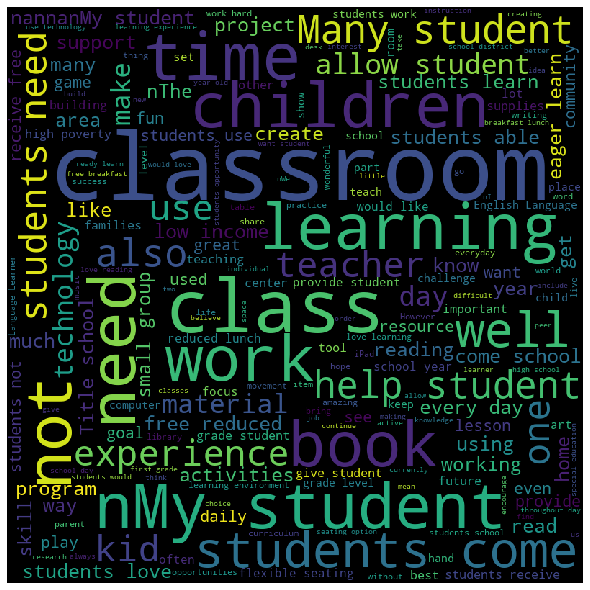

In [54]:
WordCloud_visual(X_new_agglo_1,stopwords)

# Agglormerative Clustering with k = 5

In [55]:
model_agglo = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
model_agglo.fit(X_new_agglo)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [56]:
X_new_agglo_0 = X_train[:10000].loc[list(np.where(model_agglo.labels_==0)[0])]
X_new_agglo_1 = X_train[:10000].loc[list(np.where(model_agglo.labels_==1)[0])]
X_new_agglo_2 = X_train[:10000].loc[list(np.where(model_agglo.labels_==2)[0])]
X_new_agglo_3 = X_train[:10000].loc[list(np.where(model_agglo.labels_==3)[0])]
X_new_agglo_4 = X_train[:10000].loc[list(np.where(model_agglo.labels_==4)[0])]

# Cluster 1

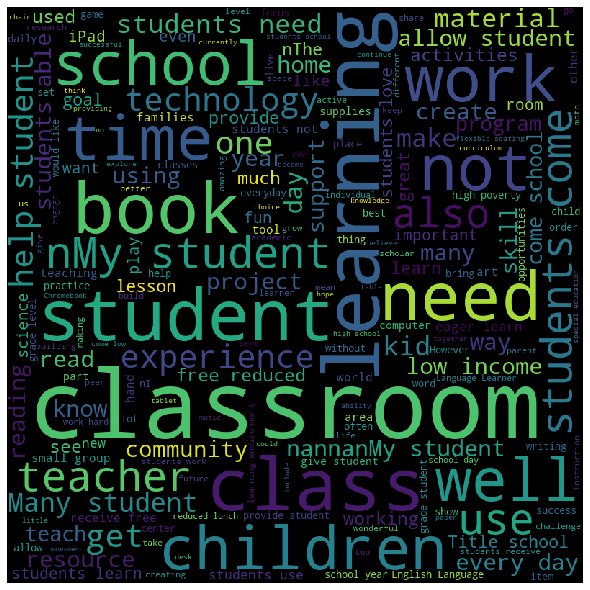

In [62]:
WordCloud_visual(X_new_agglo_0,stopwords)

In [250]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_agglo_0['teacher_prefix'].value_counts().index ),
                        y =list(X_new_agglo_0['teacher_prefix'].value_counts()))])
fig.show()

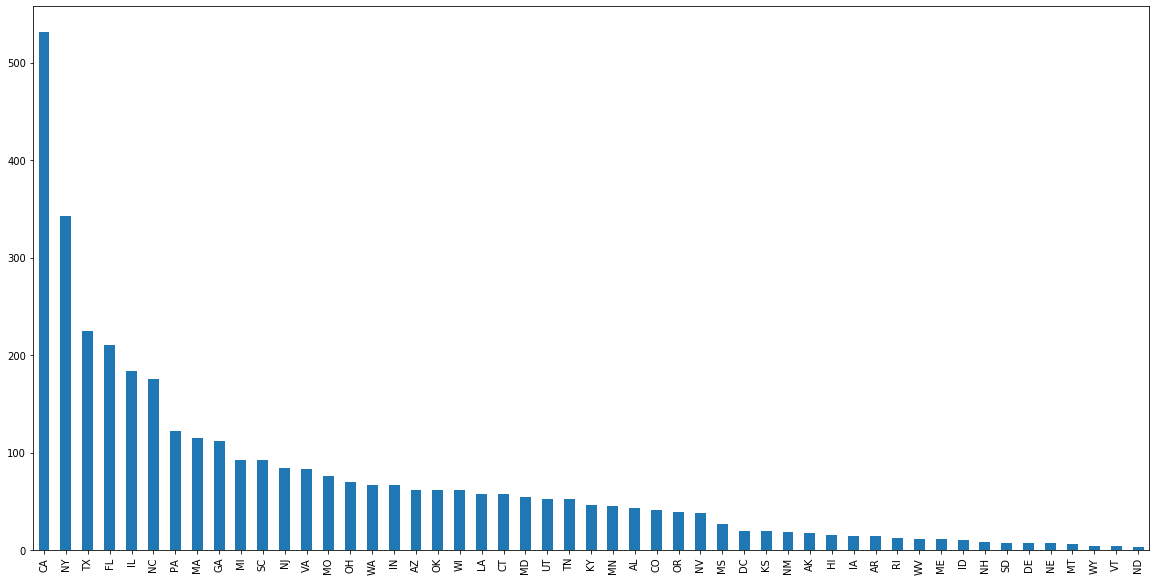

In [251]:
plt.figure(figsize = (20,10))
X_new_agglo_0['school_state'].value_counts().plot(kind='bar')

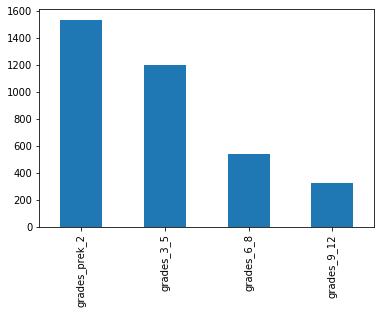

In [252]:
X_new_agglo_0['project_grade_category'].value_counts().plot(kind = 'bar')

# Cluster 2

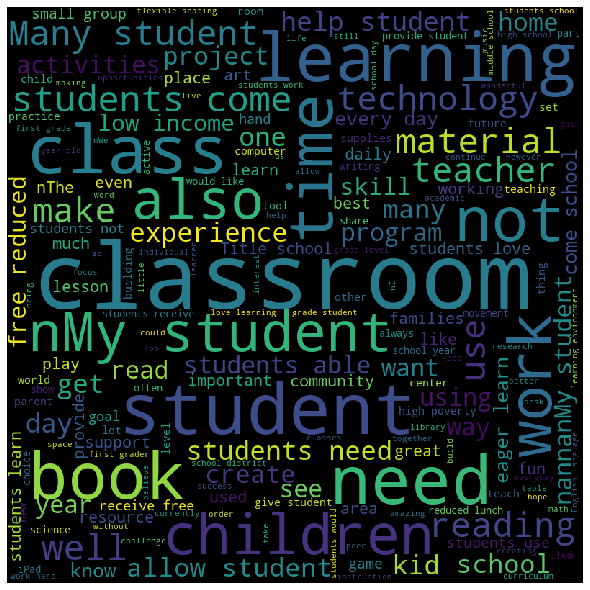

In [63]:
WordCloud_visual(X_new_agglo_1,stopwords)

In [253]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_agglo_1['teacher_prefix'].value_counts().index ),
                        y =list(X_new_agglo_1['teacher_prefix'].value_counts()))])
fig.show()

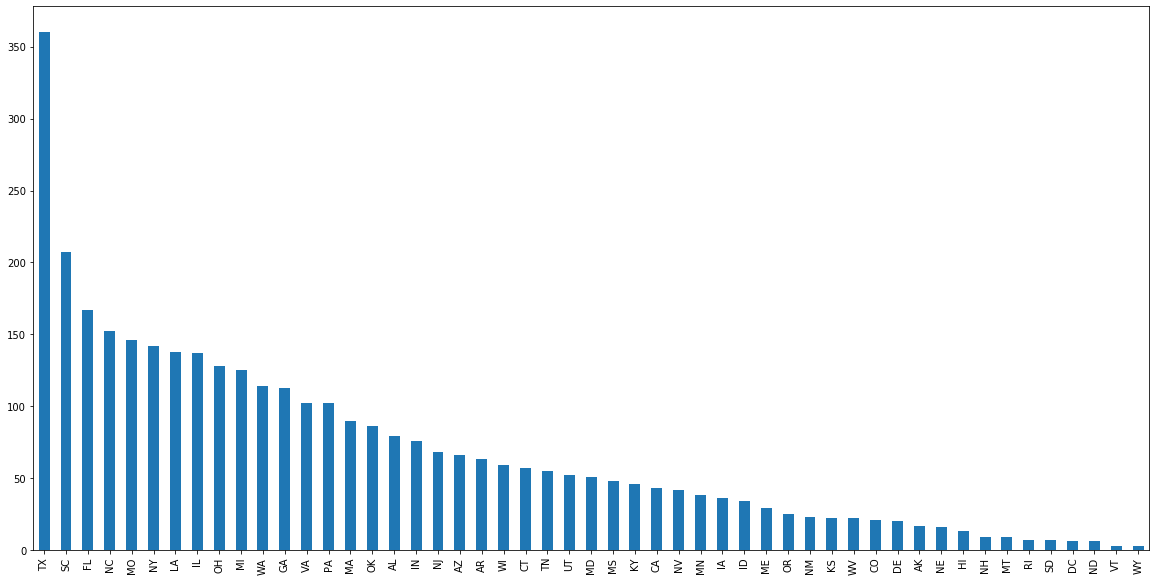

In [254]:
plt.figure(figsize = (20,10))
X_new_agglo_1['school_state'].value_counts().plot(kind='bar')

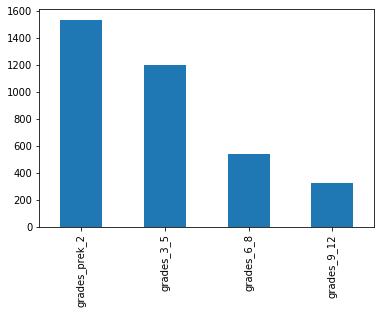

In [255]:
X_new_agglo_0['project_grade_category'].value_counts().plot(kind = 'bar')

# Cluster 3

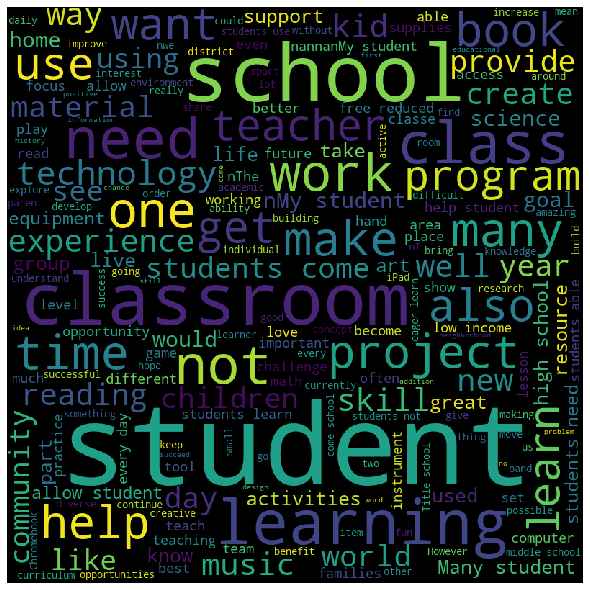

In [64]:
WordCloud_visual(X_new_agglo_2,stopwords)

In [256]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_agglo_2['teacher_prefix'].value_counts().index ),
                        y =list(X_new_agglo_2['teacher_prefix'].value_counts()))])
fig.show()

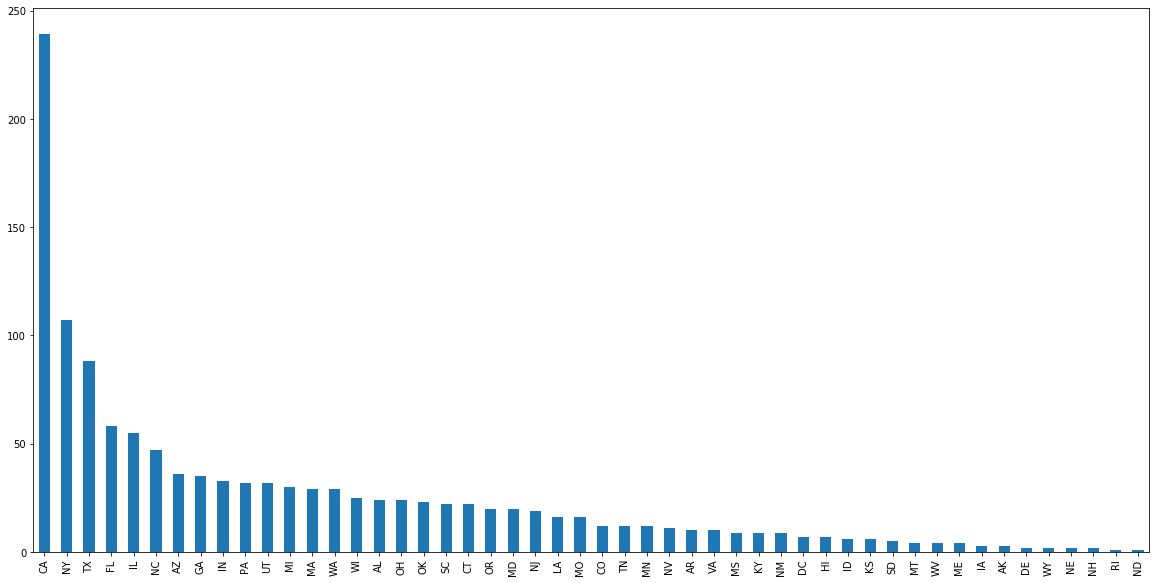

In [259]:
plt.figure(figsize = (20,10))
X_new_agglo_2['school_state'].value_counts().plot(kind='bar')

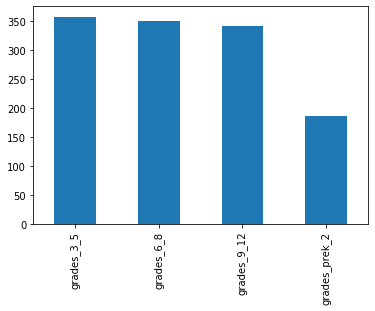

In [262]:
X_new_agglo_2['project_grade_category'].value_counts().plot(kind = 'bar')

# Cluster 4

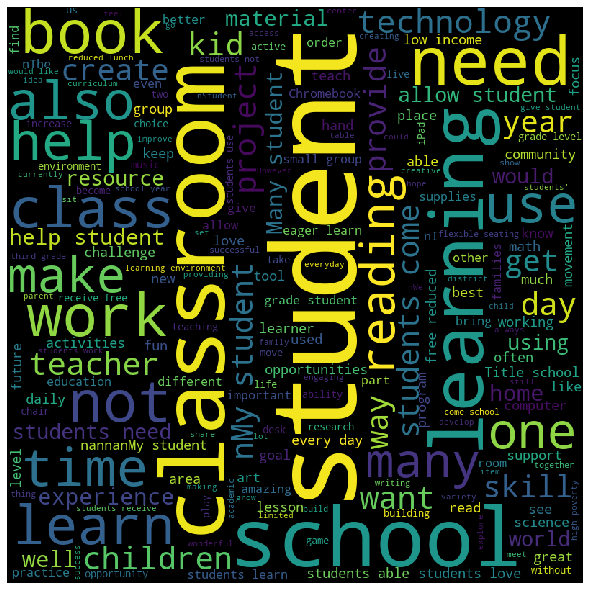

In [65]:
WordCloud_visual(X_new_agglo_3,stopwords)

In [257]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_agglo_3['teacher_prefix'].value_counts().index ),
                        y =list(X_new_agglo_3['teacher_prefix'].value_counts()))])
fig.show()

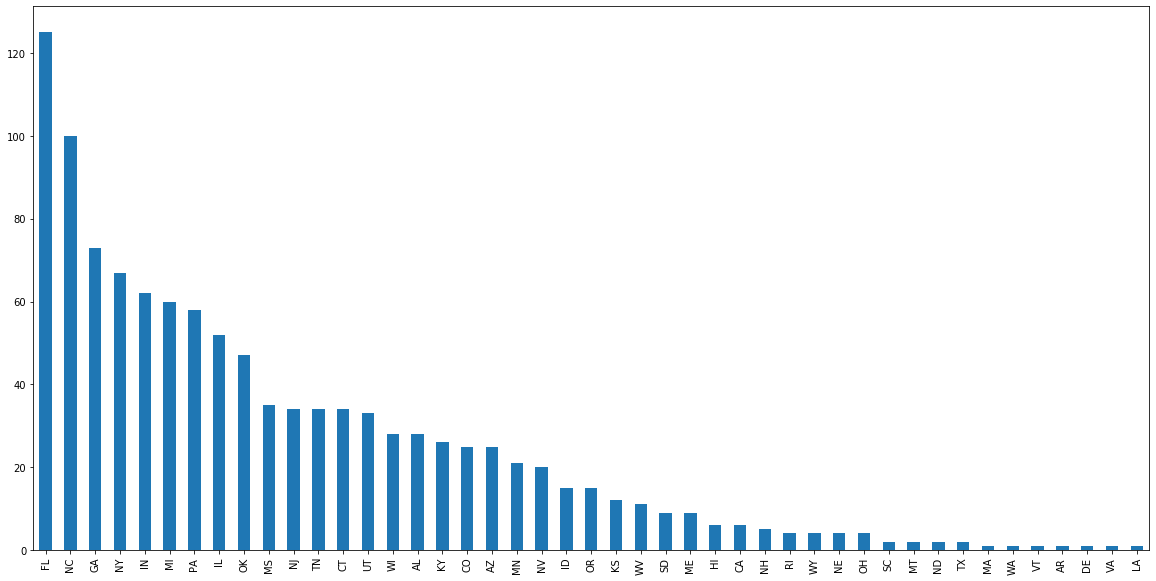

In [260]:
plt.figure(figsize = (20,10))
X_new_agglo_3['school_state'].value_counts().plot(kind='bar')

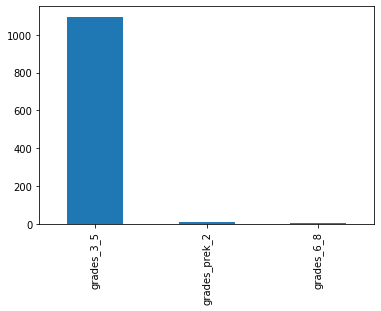

In [264]:
X_new_agglo_3['project_grade_category'].value_counts().plot(kind = 'bar')

# Cluster 5

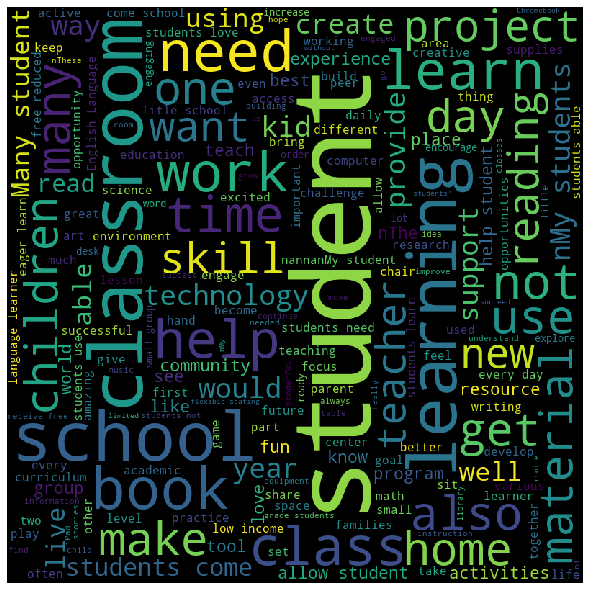

In [66]:
WordCloud_visual(X_new_agglo_4,stopwords)

In [258]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_agglo_4['teacher_prefix'].value_counts().index ),
                        y =list(X_new_agglo_4['teacher_prefix'].value_counts()))])
fig.show()

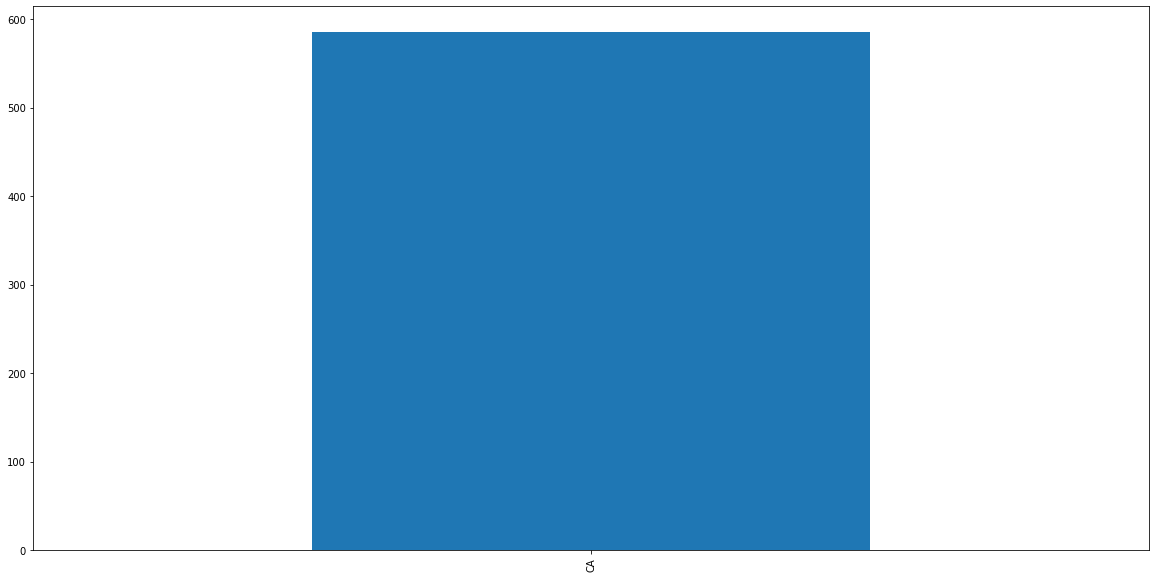

In [261]:
plt.figure(figsize = (20,10))
X_new_agglo_4['school_state'].value_counts().plot(kind='bar')

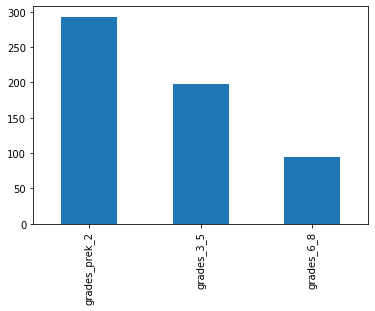

In [265]:
X_new_agglo_4['project_grade_category'].value_counts().plot(kind = 'bar')

# <font color = 'red'>Summary On the Basis of above EDA on each Cluster</font>

## We have some interesting result from above EDA :-
### In cluster 1 , we have teacher_prefix of only one category 'ms'.
### In cluster 2 , we have teacher_prefix of only one category 'mrs'.
### In cluster 3 , we have teacher_prefix of  two category 'mr' and  ' teacher' .
### In cluster 4 , we have teacher_prefix of only one category 'mrs'.
### In cluster 5 , we have teacher_prefix of only one category 'mrs'.
#### By looking above it's seems that cluster 2,4,and 5 should belong to one cluster but there is difference in these cluster.

### In cluster 4 , we have approximately all project_grade_category of one type ' grade_3_5'.
### In cluster 5 , we have school_state of only one type 'CA'.

<h2>2.7 Apply DBSCAN</h2>

In [69]:
X_new_DBSCAN = X_new[:10000]

In [115]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=5,radius=3.0).fit(X_new_DBSCAN)

In [116]:
dist,ind = model.kneighbors(X_new_DBSCAN)

In [118]:
five_knn = []
for i in dist:
    five_knn.append(i[4])

In [119]:
five_index = []
for i in ind:
    five_index.append(i[4])

In [120]:
df = pd.DataFrame({"index":five_index,"Fifth_NN":five_knn})
df.sort_values(by = "Fifth_NN",ascending=True,inplace=True)

In [133]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = list(np.arange(1,10001,1)),y = list(df['Fifth_NN'].values),mode ='markers',name = "5th Nearest Neighbors",showlegend = True ))
fig.add_trace(go.Scatter(x = [9700],y = [1.4],mode = 'lines+markers',name = 'Elbow Point'))
fig.update_layout(title = 'index vs 5 NN dist',
                  shapes=[
                # Line Vertical
            go.layout.Shape(
            type="line",
            x0=0,
            y0=1.4,
            x1=9700,
            y1=1.4,
            line=dict(
                color="red",
                width=1
            ))],
                  xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'Index Of DataPoints')),
                 yaxis = go.layout.YAxis(title = go.layout.yaxis.Title(text = "Euclidean distance of 5NN")))
fig.show()

In [134]:
model_DBSCAN = DBSCAN(eps=1.4,min_samples=5,n_jobs=-1)
model_DBSCAN.fit(X_new_DBSCAN)

DBSCAN(algorithm='auto', eps=1.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)

In [157]:
X_new_DBSCAN_0 = X_train[:10000].loc[list(np.where(model_DBSCAN.labels_==0)[0])]
X_new_DBSCAN_1 = X_train[:10000].loc[list(np.where(model_DBSCAN.labels_==1)[0])]
X_new_DBSCAN_2 = X_train[:10000].loc[list(np.where(model_DBSCAN.labels_==2)[0])]
X_new_DBSCAN_3 =X_train[:10000].loc[list(np.where(model_DBSCAN.labels_==3)[0])]
X_new_DBSCAN_noise = X_train[:10000].loc[list(np.where(model_DBSCAN.labels_==-1)[0])]

# WordCloud Visual Representation Of Each Cluster Data

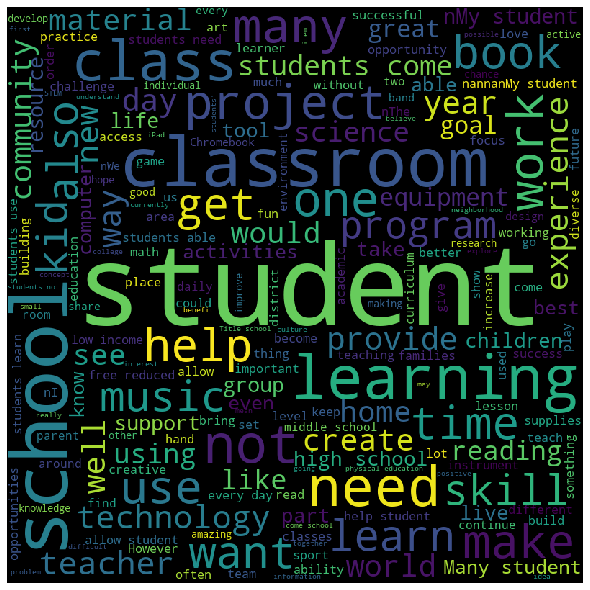

In [159]:
WordCloud_visual(X_new_DBSCAN_0,stopwords)

In [266]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_DBSCAN_0['teacher_prefix'].value_counts().index ),
                        y =list(X_new_DBSCAN_0['teacher_prefix'].value_counts()))])
fig.show()

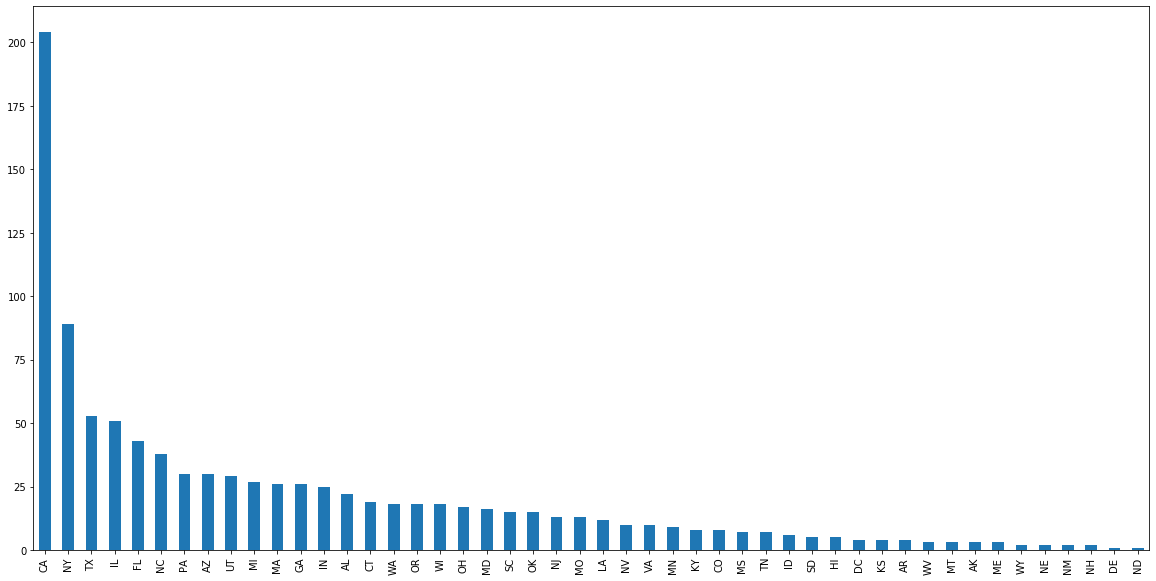

In [267]:
plt.figure(figsize = (20,10))
X_new_DBSCAN_0['school_state'].value_counts().plot(kind='bar')

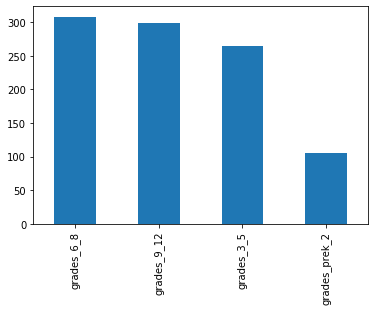

In [268]:
X_new_DBSCAN_0['project_grade_category'].value_counts().plot(kind = 'bar')

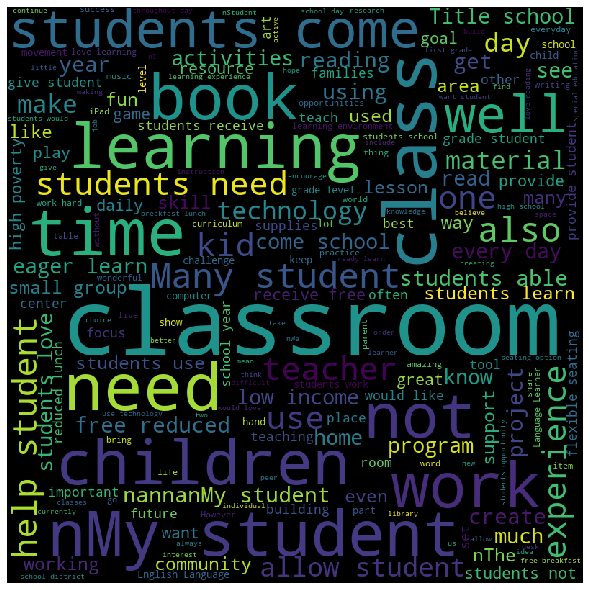

In [160]:
WordCloud_visual(X_new_DBSCAN_1,stopwords)

In [269]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_DBSCAN_1['teacher_prefix'].value_counts().index ),
                        y =list(X_new_DBSCAN_1['teacher_prefix'].value_counts()))])
fig.show()

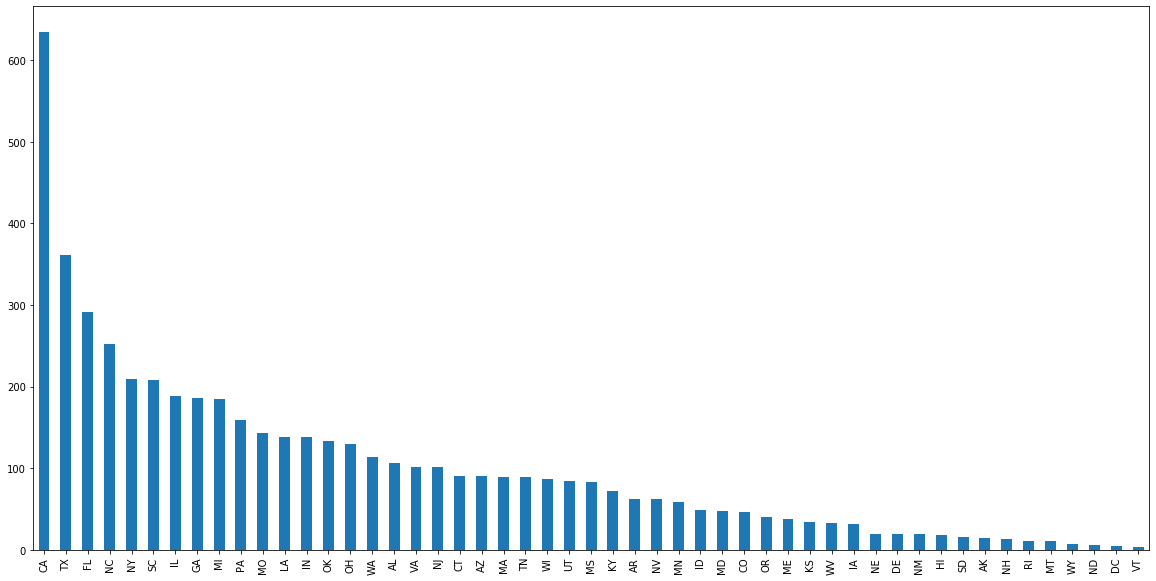

In [270]:
plt.figure(figsize = (20,10))
X_new_DBSCAN_1['school_state'].value_counts().plot(kind='bar')

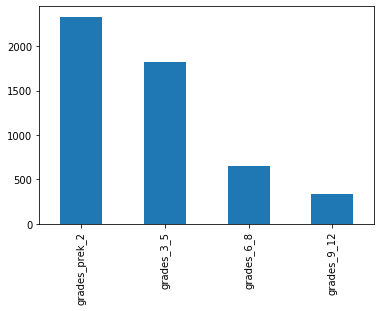

In [271]:
X_new_DBSCAN_1['project_grade_category'].value_counts().plot(kind = 'bar')

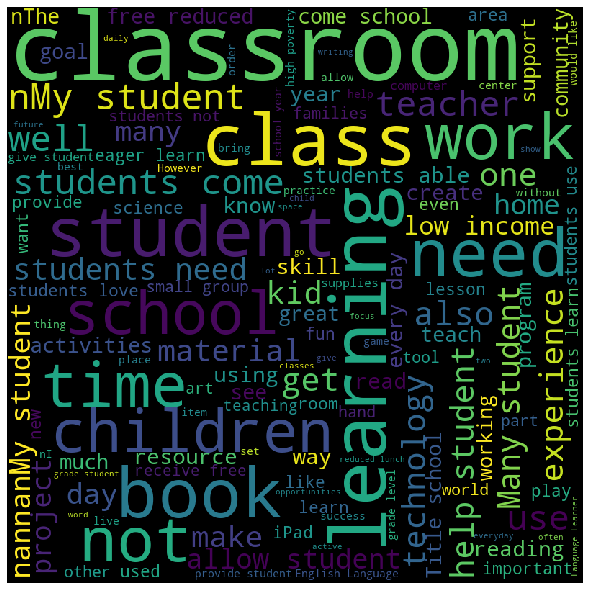

In [161]:
WordCloud_visual(X_new_DBSCAN_2,stopwords)

In [272]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_DBSCAN_2['teacher_prefix'].value_counts().index ),
                        y =list(X_new_DBSCAN_2['teacher_prefix'].value_counts()))])
fig.show()

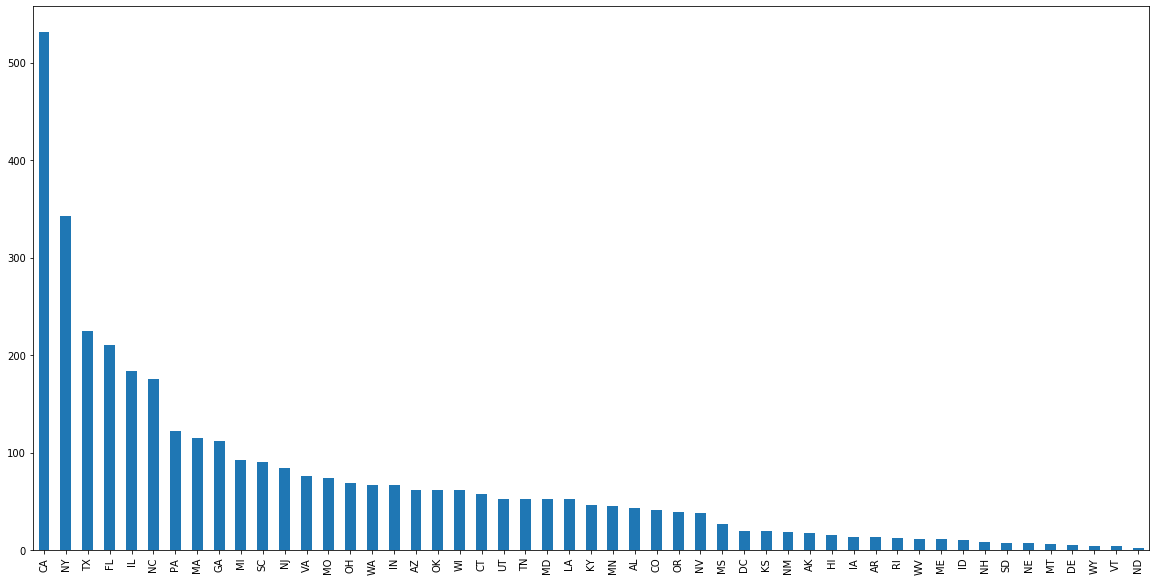

In [273]:
plt.figure(figsize = (20,10))
X_new_DBSCAN_2['school_state'].value_counts().plot(kind='bar')

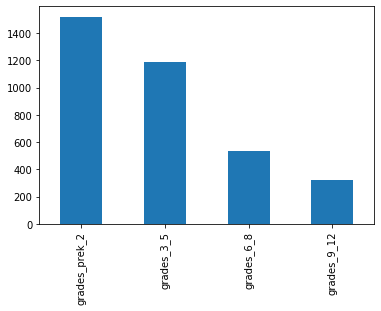

In [274]:
X_new_DBSCAN_2['project_grade_category'].value_counts().plot(kind = 'bar')

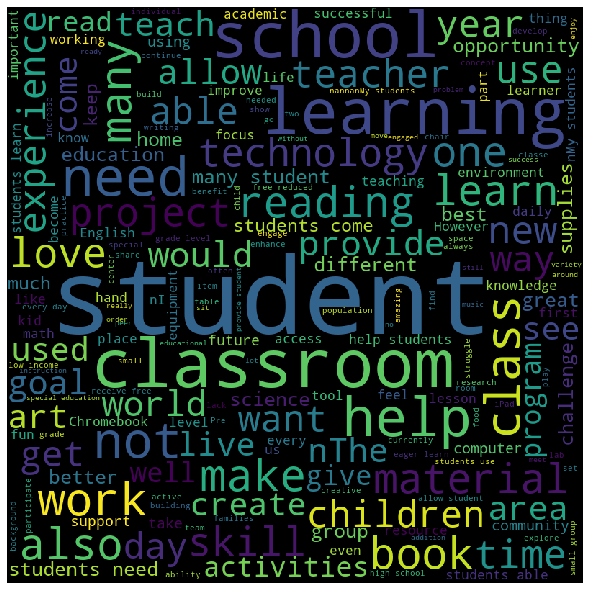

In [162]:
WordCloud_visual(X_new_DBSCAN_3,stopwords)

In [276]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_DBSCAN_3['teacher_prefix'].value_counts().index ),
                        y =list(X_new_DBSCAN_3['teacher_prefix'].value_counts()))])
fig.show()

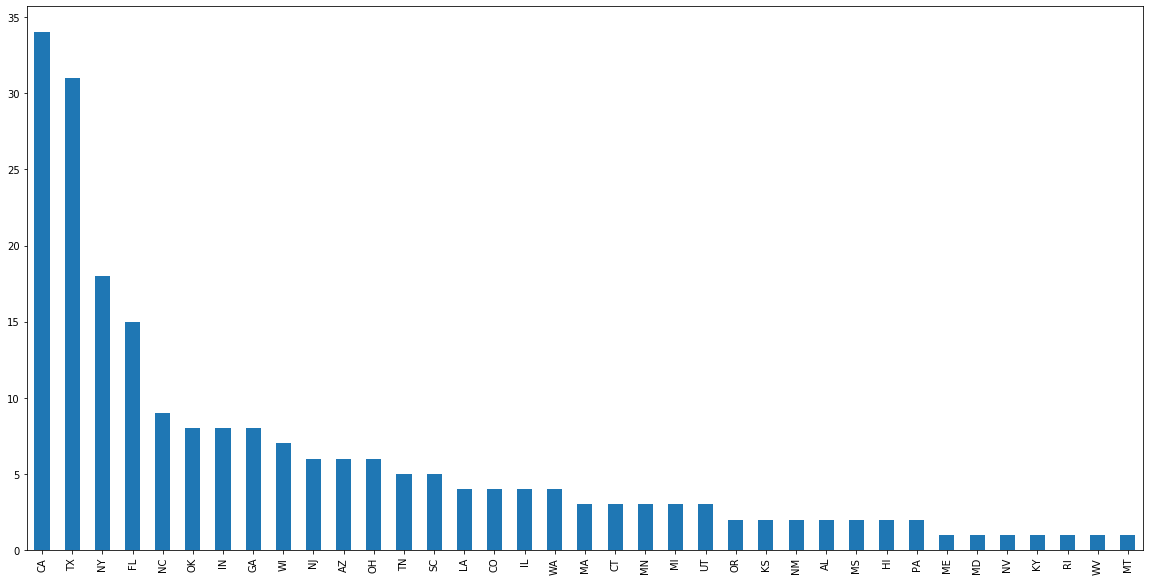

In [277]:
plt.figure(figsize = (20,10))
X_new_DBSCAN_3['school_state'].value_counts().plot(kind='bar')

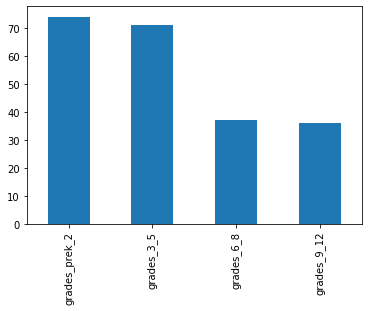

In [278]:
X_new_DBSCAN_3['project_grade_category'].value_counts().plot(kind = 'bar')

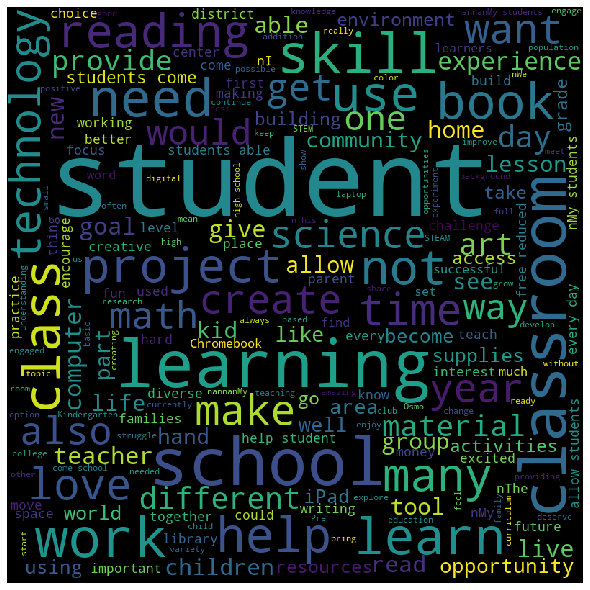

In [163]:
WordCloud_visual(X_new_DBSCAN_noise,stopwords)

In [279]:
from plotly import express as px
fig = go.Figure([go.Bar(x = list(X_new_DBSCAN_noise['teacher_prefix'].value_counts().index ),
                        y =list(X_new_DBSCAN_noise['teacher_prefix'].value_counts()))])
fig.show()

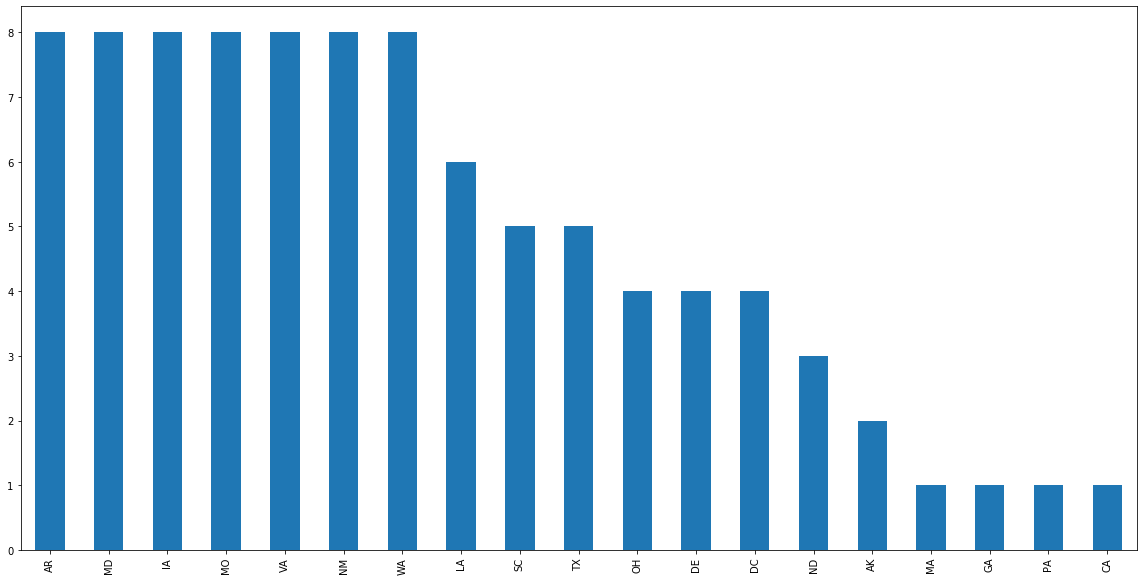

In [284]:
plt.figure(figsize = (20,10))
X_new_DBSCAN_noise['school_state'].value_counts().plot(kind='bar')


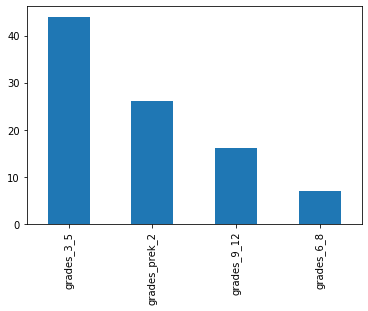

In [281]:
X_new_DBSCAN_noise['project_grade_category'].value_counts().plot(kind = 'bar')

# <font color = 'blue'> Summary on the cluster form by DBSCAN Algorithm </font>

## From the starting we have observed that cluster has unique teacher prefix category so in these cluster form by DBSCAN we have seen same trait .

### In cluster 1 , we have seen cluster data points having only one teacher_prefix category which is <font color='red'>'mr'.</font>
### In cluster 2 , we have seen cluster data points having only one teacher_prefix category which is <font color='red'>'mrs'.</font>
### In cluster 3 , we have seen cluster data points having only one teacher_prefix category which is <font color='red'>'ms'.</font>
### In cluster 4 , we have seen cluster data points having only one teacher_prefix category which is <font color='red'>'teacher'.</font>
### In cluster 5 (noisy Cluster) , we have seen cluster data points having all teacher_prefix category which is <font color='red'>'mr','mrs','teacher','ms'.</font>

## Conclusion

In [4]:
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Featurization","Model", "Cluster Form","Best Hyperparameter"]

x.add_row(["TFIDF","K-Means" ,2,2])
x.add_row(["TFIDF","Agglomerative", 5,5])
x.add_row(["TFIDF","DBSCAN", 4 , "eps = 1.4" " and " "minpts =5"])
print(x)

+---------------+---------------+--------------+-------------------------+
| Featurization |     Model     | Cluster Form |   Best Hyperparameter   |
+---------------+---------------+--------------+-------------------------+
|     TFIDF     |    K-Means    |      2       |            2            |
|     TFIDF     | Agglomerative |      5       |            5            |
|     TFIDF     |     DBSCAN    |      4       | eps = 1.4 and minpts =5 |
+---------------+---------------+--------------+-------------------------+
